# Self Organizing Maps

Fitting self organizing maps to behavioural game data, imported from .csv files `q3dm1-path1` and `q3dm1-path2`. The file q3dm1-path1.csv contains a sequence

$$x[1] : x[2] : x[3] : x[4] : · · · : x[n]$$ 

of $n = 1327$ 3D locations the avatar of a human player was seen at while moving around the Quake III map `q3dm1`. 

The mentioned data structure resembles circle and folded Möbius strip respectively. In both cases we set the topology to be a cyclic graph $v_1 ↔v_2 ↔...↔v_k ↔v_1$ of k vertices. 

Data points are visualized in *blue* and the SOM weights in *red*.

<IPython.core.display.Javascript object>


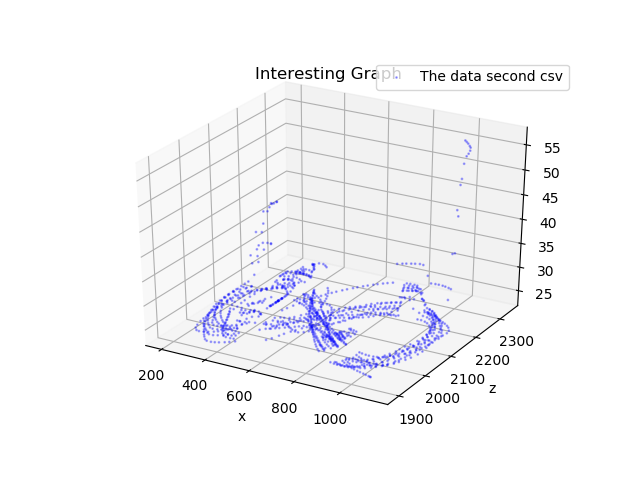

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []

with open('q3dm1-path2.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))
        z.append(float(row[2]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x , y, z, color = "blue", alpha=0.3, s= 1, label='The data second csv')
plt.xlabel('x')
plt.ylabel('y')
plt.ylabel('z')
plt.title('Infinity like looking data')
plt.legend()
plt.show()

In [2]:
import numpy.random as rnd 
import networkx as nx

def trainSOM(matX, G, tmax=1000, sigma0=1., eta0=1., k=20):
    m, n = matX.shape
    Giterx, Gitery, Giterz = [], [], []
    # compute matrix of squared path length distances between neurons
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    # because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    # a list of tmax random indices into the columns of matrix X
    smpl = rnd.randint(0, n, size=tmax)
    for t in range(tmax):
        # sample a point x, i.e. a column of matrix X
        vecX = matX[:,smpl[t]]
        # determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]['w'] - vecX)**2) for v in G])
        # update the learning rate
        eta = eta0 * (1. - t/tmax)
        # update the topological adaption rate
        sigma = sigma0 * np.exp(-t/tmax)
        # update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5 * matD[b,i] / sigma**2)
            G.nodes[v]['w'] += eta * h * (vecX - G.nodes[v]['w'])
        xi, yi, zi = xyztemp(G, k)
        #print(xi)
        Giterx.append(xi), Gitery.append(yi), Giterz. append(zi)
        
    return G, Giterx, Gitery, Giterz

In [7]:
def xyztemp(SOM1, k):
    x1, y1, z1 = [], [], []
    for i in range(k-1):
        tempx,tempy,tempz = SOM1.nodes[i]['w']
        x1.append(tempx), y1.append(tempy), z1.append(tempz)
    
    tempx,tempy,tempz = SOM1.nodes[0]['w']
    x1.append(tempx), y1.append(tempy), z1.append(tempz)
        
    return x1,y1,z1
    


In [8]:
import networkx as nx

def initRingSOM(matX, k):
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(n, k, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[:,smpl[i]]
    return G

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time
import numpy.random as rnd 


def plot_SOM(data_path, k = 20, max_iter = 1000):
    x = []
    y = []
    z = []

    with open(data_path,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            x.append(float(row[0]))
            y.append(float(row[1]))
            z.append(float(row[2]))

    data = np.vstack((x,y,z))
    data.shape

    matX = data

    SOM1 = initRingSOM(matX, k)
    print(SOM1.nodes)

    fig = plt.figure()
    #fig.set_figheight(15)
    #fig.set_figwidth(15)
    ax = fig.add_subplot(111, projection='3d')
    plt.ion()

    fig.show()
    fig.canvas.draw()

    ax.clear()

    SOM1, Gx, Gy, Gz = trainSOM(matX, SOM1, tmax = max_iter, k = k)
    nx.write_gpickle(SOM1, 'som.gpickle')
    
    for iter in np.linspace(1, max_iter-1, max_iter-1):
        ax.clear()
        ax.scatter(x , y, z, color = "blue", alpha=0.3, s = 1, label='The data first csv')
        ax.plot(Gx[int(iter)], Gy[int(iter)], Gz[int(iter)], 'o-', color = "red", alpha=0.3, label='The data first csv')
        #ax.scatter(Gx[int(iter)], Gy[int(iter)], Gz[int(iter)], color = "red", s = 100, alpha=0.3, label='The data first csv')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylabel('z')
        plt.title('Circle i: iteration = '+str(iter))
        plt.legend()
        #plt.show()
        fig.canvas.draw()
        time.sleep(0.001)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


<IPython.core.display.Javascript object>


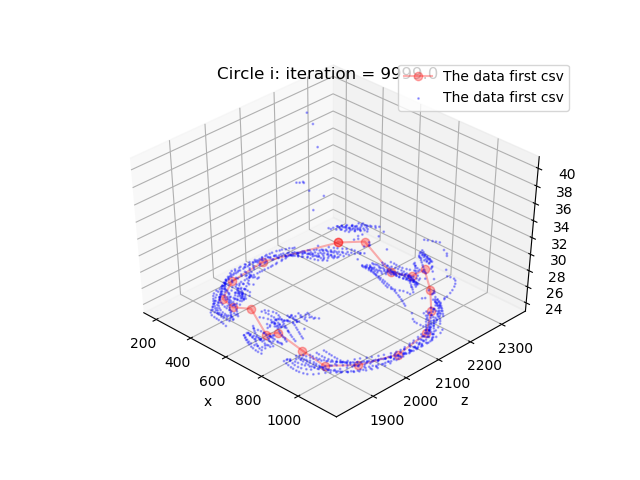

In [23]:
plot_SOM("q3dm1-path1.csv", max_iter = 10000)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


<IPython.core.display.Javascript object>


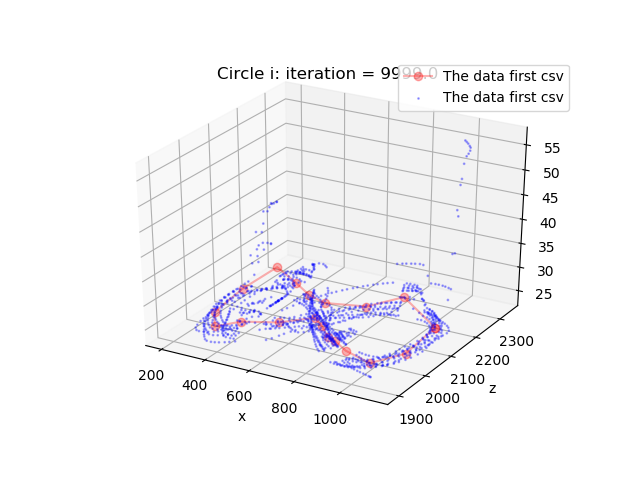

In [24]:
plot_SOM("q3dm1-path2.csv", max_iter = 10000)